In [4]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt

charge=[x,y,c]

In [5]:
X=0
Y=1
C=2
TIMESCALE=1
E0=1

In [11]:
def compute_force(c1,c2):
    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


TypeError: Failed in cuda mode pipeline (step: fix up args)
Signature mismatch: 3 argument types given, but function takes 2 arguments

In [10]:
compute_force([1,0,1],[-1,0,1])

C:\Users\bjste\AppData\Local\Temp\ipykernel_2172\1692416078.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "compute_force" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Users\bjste\AppData\Local\Temp\ipykernel_2172\1692416078.py (3)

File "C:\Users\bjste\AppData\Local\Temp\ipykernel_2172\1692416078.py", line 3:
def compute_force(c1,c2):
    c_dir=c1[C]*c2[C]
    ^

  @numba.vectorize
c:\Users\bjste\.conda\envs\tf-gpu\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "compute_force" was compiled in object mode without forceobj=True.

File "C:\Users\bjste\AppData\Local\Temp\ipykernel_2172\1692416078.py", line 2:
@numba.vectorize
def compute_force(c1,c2):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
c:\Users\bjste\.conda\envs\tf-gpu\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

TypeError: return type must be specified for object mode

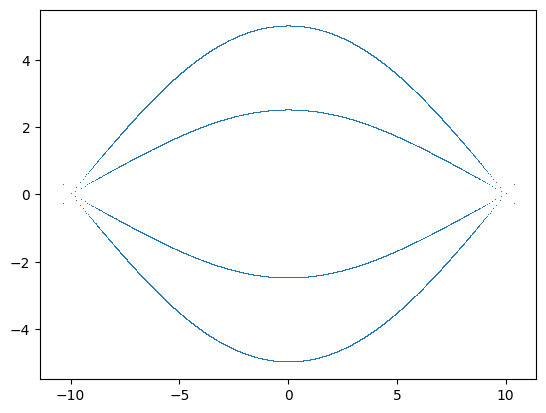

array([[-1.13882007e-03,  5.00000000e+00, -1.00000000e+00],
       [-2.27764016e-03,  4.99999984e+00, -1.00000000e+00],
       [-3.41646032e-03,  4.99999953e+00, -1.00000000e+00],
       ...,
       [ 9.79417026e+00, -7.46230567e-02,  1.00000000e+00],
       [-1.00000000e+01,  0.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [8]:
lst=[]
testcharge=[0,5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## underside
testcharge=[0,-5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## plot

lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],",")
plt.show()
lst

Cuda Implementation

In [ ]:
def cu_Draw(static_cs,free_cs):
    